<H1>Simple Fourier</H1>

In [1]:
%pylab inline
# load custom data
speed = np.loadtxt('speed.txt', comments='//')
dt = 1/6. # in hours
time = np.arange(0,len(speed)*dt, dt)


Populating the interactive namespace from numpy and matplotlib


<H2>Plot time course</H2>

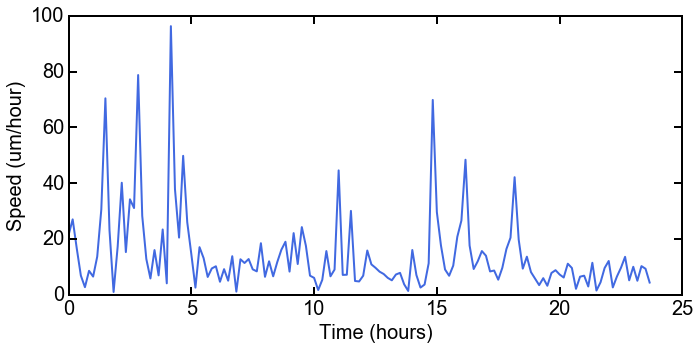

In [2]:
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(time, speed, color='royalblue');
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');

<H2>Basic Fourier transform</H2>

In [3]:
n = len(speed) # length of the signal
k = np.arange(n)

dt = 1/6. # 6 in one hours

T = n*dt 
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(speed)/n # fft computing and normalization

Y0 = Y0[range(n/2)]

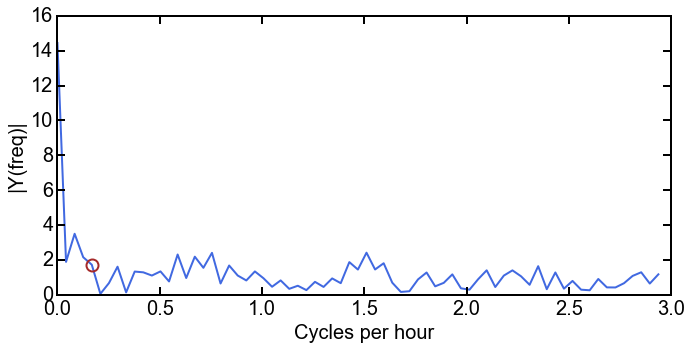

In [4]:
fig = figure(figsize=(11,5))

plt.plot(frq, abs(Y0), color = 'royalblue') # plotting the spectrum


plt.plot(frq[4], abs(Y0)[4], 'o', ms=12, markerfacecolor='None', markeredgecolor='brown', markeredgewidth=2.0 )
plt.xlabel('Cycles per hour')
plt.ylabel('|Y(freq)|')

In [5]:
abs(Y0)[0:10]

array([ 14.43683815,   1.88686005,   3.49970111,   2.15597437,
         1.72543356,   0.0544734 ,   0.6724186 ,   1.61218123,
         0.13933287,   1.33284677])

In [6]:
frq[:10]

array([ 0.        ,  0.04195804,  0.08391608,  0.12587413,  0.16783217,
        0.20979021,  0.25174825,  0.29370629,  0.33566434,  0.37762238])

<H3> Analyze periodicity every 3 hours</H3>

In [8]:
n = len(speed) # length of the signal
k = np.arange(n)

dt = 1/18. # 6 in one hours

T = n*dt 
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(speed)/n # fft computing and normalization

Y0 = Y0[range(n/2)]

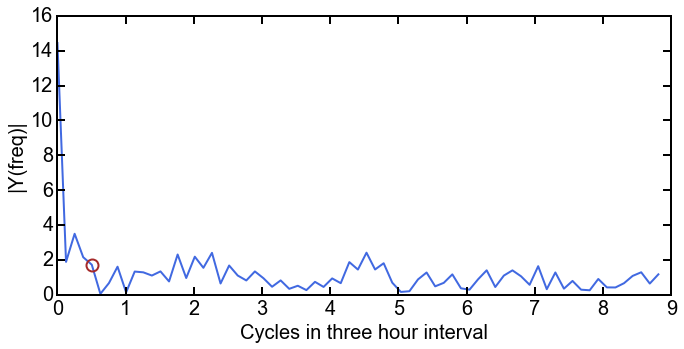

In [9]:
fig = figure(figsize=(11,5))

plt.plot(frq, abs(Y0), color = 'royalblue') # plotting the spectrum


plt.plot(frq[4], abs(Y0)[4], 'o', ms=12, markerfacecolor='None', markeredgecolor='brown', markeredgewidth=2.0 )
plt.xlabel('Cycles in three hour interval')
plt.ylabel('|Y(freq)|')